In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
df_path = os.path.join(os.getcwd(), 'Datasets', 'Index2018.csv')

In [3]:
raw_df = pd.read_csv(df_path)

In [4]:
df_w = raw_df.copy()

In [5]:
df_w

date          spx       dax         ftse    nikkei
0     07/01/1994   469.900000   2224.95  3445.980000  18124.01
1     10/01/1994   475.270000   2225.00  3440.580000  18443.44
2     11/01/1994   474.130000   2228.10  3413.770000  18485.25
3     12/01/1994   474.170000   2182.06  3372.020000  18793.88
4     13/01/1994   472.470000   2142.37  3360.010000  18577.26
...          ...          ...       ...          ...       ...
6264  23/01/2018  2839.130362  13559.60  7731.827774  24124.15
6265  24/01/2018  2837.544008  13414.74  7643.428966  23940.78
6266  25/01/2018  2839.253031  13298.36  7615.839954  23669.49
6267  26/01/2018  2872.867839  13340.17  7665.541292  23631.88
6268  29/01/2018  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 5 columns]

In [6]:
df_w.describe()

spx           dax         ftse        nikkei
count  6269.000000   6269.000000  6269.000000   6269.000000
mean   1288.127542   6080.063363  5422.713545  14597.055700
std     487.586473   2754.361032  1145.572428   4043.122953
min     438.920000   1911.700000  2876.600000   7054.980000
25%     990.671905   4069.350000  4486.100000  10709.290000
50%    1233.420000   5773.340000  5662.430000  15028.170000
75%    1459.987747   7443.070000  6304.250000  17860.470000
max    2872.867839  13559.600000  7778.637689  24124.150000

isna() restituisce un df in cui per ogni cella del df su cui viene chiamato viene assegnato un valore boolean (false se il valore non è nullo, true se lo è)

In [7]:
df_w.isna()

date    spx    dax   ftse  nikkei
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False
4     False  False  False  False   False
...     ...    ...    ...    ...     ...
6264  False  False  False  False   False
6265  False  False  False  False   False
6266  False  False  False  False   False
6267  False  False  False  False   False
6268  False  False  False  False   False

[6269 rows x 5 columns]

sum() chiamato sul df restituisce la somma di tutti i valori nulli per colonna ( ossia quelli che sono true e dunque hanno valore 1 )

In [8]:
df_w.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Se dà problemi per WebGL non supportato, utilizzare l'opzione render_mode con svg

In [9]:
fig = px.line(df_w, x='date', y=['spx', 'dax', 'ftse', 'nikkei'], render_mode='svg', hover_name='date')
fig.show()

Proviamo a trasformare il df da wide a long

In [10]:
df_long = df_w.melt(id_vars="date", var_name="indice", value_name="valore")

Ora il nuovo df ha "riformattato" il vecchio creando una colonna indice in cui vengono inseriti come valori le colonne del df precedente associandovi il rispettivo valore nella relativa colonna. In sintesi, si otterranno 4 record per ogni data, ognuno relativo a un indice specifico

In [11]:
df_long

date  indice    valore
0      07/01/1994     spx    469.90
1      10/01/1994     spx    475.27
2      11/01/1994     spx    474.13
3      12/01/1994     spx    474.17
4      13/01/1994     spx    472.47
...           ...     ...       ...
25071  23/01/2018  nikkei  24124.15
25072  24/01/2018  nikkei  23940.78
25073  25/01/2018  nikkei  23669.49
25074  26/01/2018  nikkei  23631.88
25075  29/01/2018  nikkei  23629.34

[25076 rows x 3 columns]

In questo caso ho la necessità di raggruppare i dati dentro il grafico, specificando per cosa (in questo caso indice)

In [12]:
fig2 = px.line(df_long, x='date', y='valore', line_dash='indice', color='indice', render_mode='svg', hover_name='indice', title='Bank Indexes', subtitle='Daily', width=900, height=600)
fig2.show()

In [13]:
fig2 = px.line(df_long, x='date', y='valore', line_dash='indice', color='indice', render_mode='svg', hover_name='indice', facet_col='indice', facet_col_wrap=2)
fig2.show()

QQ Plot

In [14]:
import scipy.stats as stats
import pylab as pl

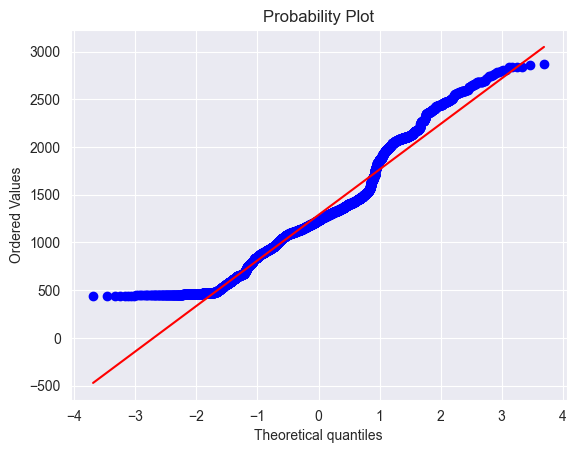

In [15]:
stats.probplot(df_w.spx, plot = pl)
pl.show()

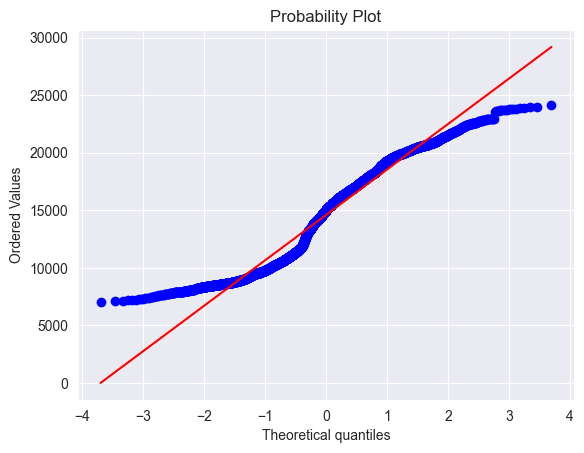

In [16]:
stats.probplot(df_w.nikkei, plot = pl)
pl.show()

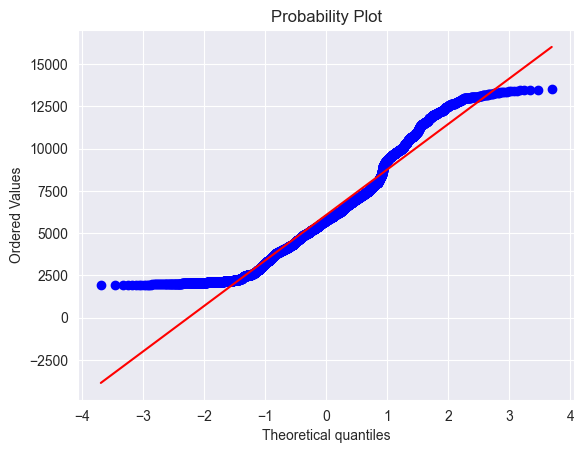

In [17]:
stats.probplot(df_w.dax, plot = pl)
pl.show()

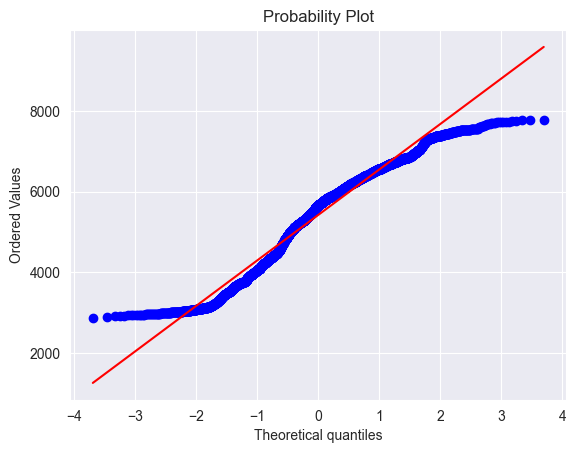

In [18]:
stats.probplot(df_w.ftse, plot = pl)
pl.show()

Nessuno degli indici segue una distribuzione normale

In [19]:
print(df_w.dtypes)

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object


Procediamo ora a formattare la colonna delle date da object a datetime

In [20]:
df_w.date = pd.to_datetime(df_w.date, dayfirst=True)

In [21]:
print(df_w.dtypes)

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object


In [22]:
df_w.head()

date     spx      dax     ftse    nikkei
0 1994-01-07  469.90  2224.95  3445.98  18124.01
1 1994-01-10  475.27  2225.00  3440.58  18443.44
2 1994-01-11  474.13  2228.10  3413.77  18485.25
3 1994-01-12  474.17  2182.06  3372.02  18793.88
4 1994-01-13  472.47  2142.37  3360.01  18577.26

In [23]:
df_w.describe()

date          spx           dax         ftse  \
count                           6269  6269.000000   6269.000000  6269.000000   
mean   2006-01-14 19:36:59.492742144  1288.127542   6080.063363  5422.713545   
min              1994-01-07 00:00:00   438.920000   1911.700000  2876.600000   
25%              2000-01-11 00:00:00   990.671905   4069.350000  4486.100000   
50%              2006-01-12 00:00:00  1233.420000   5773.340000  5662.430000   
75%              2012-01-19 00:00:00  1459.987747   7443.070000  6304.250000   
max              2018-01-29 00:00:00  2872.867839  13559.600000  7778.637689   
std                              NaN   487.586473   2754.361032  1145.572428   

             nikkei  
count   6269.000000  
mean   14597.055700  
min     7054.980000  
25%    10709.290000  
50%    15028.170000  
75%    17860.470000  
max    24124.150000  
std     4043.122953

Ammettiamo ora di voler settare la colonna date come index, controlliamo innanzitutto che i valori siano univoci

In [24]:
df_w["date"].is_unique

True

Ottimo, se avessi voluto controllare quali fossero i duplicati: 

In [25]:
duplicati = df_w["date"][df_w["date"].duplicated()]
print(duplicati)

Series([], Name: date, dtype: datetime64[ns])


In [26]:
df_w.set_index('date', inplace=True)

In [27]:
df_w.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

Ammettiamo che non esistano alcune date nel nostro dataframe. Posso usare il metodo asfreq per settare la frequenza del df, in questo caso giornaliera. In questo modo, laddove non esistano, vengono creati i record corrispondenti a queste (con valori null). Utilizzare 'd' per una frequenza giornaliera sull'intera settimana o 'b' per avere solo i giorni lavorativi.

In [28]:
df_w = df_w.asfreq('b')

In [29]:
df_w.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

In [30]:
df_w.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Si può notare che as freq ha generato 8 valori nulli per ogni indice. Bisogna ora scegliere la corretta strategia per fillare i valori

In [31]:
df_w.spx = df_w.spx.ffill()

In [32]:
df_w.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In questo caso abbiamo scelto ffill, che riempie i valori nulli con il valore che li precede nella time series ( bfill riempie con il valore successivo )

In [33]:
df_w.ftse = df_w.ftse.bfill()

In [34]:
df_w.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

Posso anche riempire i valori mancanti assegnando un valore arbitrario (in questo caso si è scelto la media)

In [35]:
df_w.dax = df_w.dax.fillna(value = df_w.dax.mean())

In [36]:
df_w.nikkei = df_w.nikkei.ffill()

In [37]:
df_w.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Semplifichiamo ora il dataset e concentriamoci ora solo sulla serie spx

Per creare una nuova colonna. In questo caso creo una colonna market_value con i valori di spx

In [38]:
df_w['market_value'] = df_w.spx

In [39]:
df_w.describe()

spx           dax         ftse        nikkei  market_value
count  6277.000000   6277.000000  6277.000000   6277.000000   6277.000000
mean   1288.642547   6080.063363  5423.690398  14597.672753   1288.642547
std     487.868210   2752.604984  1145.568370   4043.795272    487.868210
min     438.920000   1911.700000  2876.600000   7054.980000    438.920000
25%     992.715221   4070.460000  4487.880000  10701.130000    992.715221
50%    1233.761241   5774.380000  5663.300000  15030.510000   1233.761241
75%    1460.250000   7442.660000  6304.630175  17860.470000   1460.250000
max    2872.867839  13559.600000  7778.637689  24124.150000   2872.867839

Per cancellare una colonna

In [40]:
del df_w['spx']

In [41]:
df_w

dax         ftse    nikkei  market_value
date                                                     
1994-01-07   2224.95  3445.980000  18124.01    469.900000
1994-01-10   2225.00  3440.580000  18443.44    475.270000
1994-01-11   2228.10  3413.770000  18485.25    474.130000
1994-01-12   2182.06  3372.020000  18793.88    474.170000
1994-01-13   2142.37  3360.010000  18577.26    472.470000
...              ...          ...       ...           ...
2018-01-23  13559.60  7731.827774  24124.15   2839.130362
2018-01-24  13414.74  7643.428966  23940.78   2837.544008
2018-01-25  13298.36  7615.839954  23669.49   2839.253031
2018-01-26  13340.17  7665.541292  23631.88   2872.867839
2018-01-29  13324.48  7671.533300  23629.34   2853.528411

[6277 rows x 4 columns]

Posso cancellare più colonne assieme

In [42]:
del df_w['dax'], df_w['ftse'], df_w['nikkei']

In [43]:
df_w.describe()

market_value
count   6277.000000
mean    1288.642547
std      487.868210
min      438.920000
25%      992.715221
50%     1233.761241
75%     1460.250000
max     2872.867839

Separazione del df in training e test. Prima si calcola l'80% della grandezza del df attuale

In [44]:
size = (int)(len(df_w)*0.8)

Dopodichè si splitta

In [49]:
df_train = df_w.iloc[:size]
df_test = df_w.iloc[size:]

### Funzionamento di `iloc` nello split train-test

Supponiamo di avere:

```python
df_train = df_w.iloc[:size]
df_test = df_w.iloc[size:]
```

---

#### Cos'è `iloc`

✅ `iloc` significa **integer-location based indexing** → accede alle righe (e colonne) del DataFrame usando **posizioni numeriche** (0, 1, 2, …).

---

#### Funzionamento qui

- `df_w.iloc[:size]`
  Prende tutte le righe di `df_w` dalla **posizione 0** fino alla posizione **size - 1** (il limite superiore `size` è escluso).
  ```python
  df_w.iloc[0:size]
  ```

- `df_w.iloc[size:]`
  Prende tutte le righe di `df_w` dalla **posizione `size`** fino alla fine.
  ```python
  df_w.iloc[size:len(df_w)]
  ```

In pratica stai dividendo il DataFrame:
- `df_train` → le prime `size` righe
- `df_test` → le righe rimanenti

---

#### Differenza rispetto a `loc`

| Metodo | Usa | Limite superiore incluso? |
|---------|------|--------------------------|
| `iloc` | Posizioni numeriche (0,1,2,...) | ❌ No (esclusivo) |
| `loc` | Etichette dell’indice | ✅ Sì (inclusivo) |

Esempio:
```python
df_w.iloc[0:5]  # posizioni 0,1,2,3,4
df_w.loc[0:5]   # righe con indice 0,1,2,3,4,5 (se esistono)
```

---

#### Schema visivo

Immagina un DataFrame così:

| index | posizione |
|--------|-----------|
| 10     | 0         |
| 11     | 1         |
| 12     | 2         |
| 13     | 3         |
| 14     | 4         |

- `df_w.iloc[:3]` → posizioni 0, 1, 2 → indici 10, 11, 12
- `df_w.loc[:12]` → righe con indici 10, 11, 12

---

#### Conclusione

✅ Con `iloc` stai dividendo il DataFrame in base alla **posizione fisica** delle righe, indipendentemente dai valori dell'indice.


In [50]:
df_train.tail()


market_value
date                    
2013-04-01   1562.173837
2013-04-02   1570.252238
2013-04-03   1553.686978
2013-04-04   1559.979316
2013-04-05   1553.278930

In [51]:
df_test.head()

market_value
date                    
2013-04-08   1563.071269
2013-04-09   1568.607909
2013-04-10   1587.731827
2013-04-11   1593.369863
2013-04-12   1588.854623